In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-depression-dataset/Student Depression Dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/student-depression-dataset/Student Depression Dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [3]:
df.shape

(27901, 18)

In [4]:
thoughts = df.iloc[:, [13]].value_counts()
thoughts

Have you ever had suicidal thoughts ?
Yes                                      17656
No                                       10245
Name: count, dtype: int64

In [5]:
thoughts['Yes']/len(df.values)

0.6328088598974947

In [6]:
df.isna().any()

id                                       False
Gender                                   False
Age                                      False
City                                     False
Profession                               False
Academic Pressure                        False
Work Pressure                            False
CGPA                                     False
Study Satisfaction                       False
Job Satisfaction                         False
Sleep Duration                           False
Dietary Habits                           False
Degree                                   False
Have you ever had suicidal thoughts ?    False
Work/Study Hours                         False
Financial Stress                          True
Family History of Mental Illness         False
Depression                               False
dtype: bool

In [7]:
# drop na rows
#df.drop(df[df['Financial Stress'].isna()].index, axis = 0, inplace=True)
df.dropna(inplace = True)
df.shape

(27898, 18)

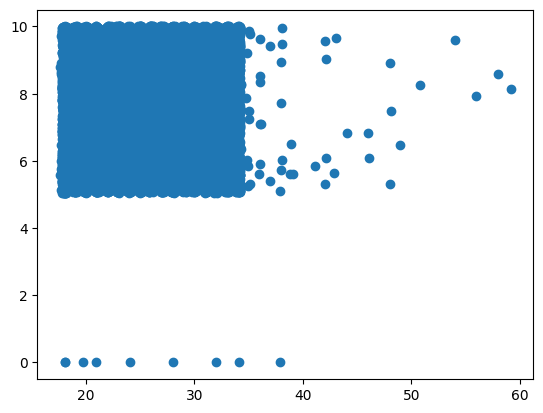

In [8]:

jitter_x = np.random.normal(0, 0.1, len(df.values))  # Small noise for x-axis
jitter_y = np.random.normal(0, 0.1, len(df.values))  # y axis
plt.scatter(np.array(df['Age']) + jitter_x, np.array(df['CGPA']) )

In [9]:
np.corrcoef(np.array(df['Academic Pressure']), np.array(df['CGPA']))[0, 1]

-0.02225164612545061

In [10]:
group_by_degree = df[['Degree', 'Depression']].groupby(by = 'Degree').sum()
group_by_degree

,Depression
Degree,
B.Arch,871
B.Com,853
B.Ed,1021
B.Pharm,428
B.Tech,655
BA,321
BBA,407
BCA,818
BE,334


<BarContainer object of 28 artists>

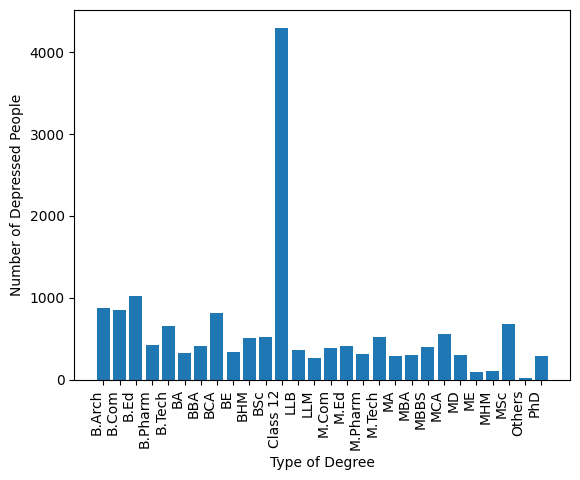

In [11]:
len(group_by_degree.values)
plt.xticks(rotation=90, ha='right')
plt.xlabel("Type of Degree")
plt.ylabel("Number of Depressed People")
plt.bar(group_by_degree.index, height = group_by_degree.Depression)


In [12]:
group_by_degree['Depression']/len(df.values)

Degree
B.Arch      0.031221
B.Com       0.030576
B.Ed        0.036598
B.Pharm     0.015342
B.Tech      0.023478
BA          0.011506
BBA         0.014589
BCA         0.029321
BE          0.011972
BHM         0.018245
BSc         0.018747
Class 12    0.154240
LLB         0.012761
LLM         0.009284
M.Com       0.013979
M.Ed        0.014876
M.Pharm     0.011255
M.Tech      0.018675
MA          0.010395
MBA         0.010861
MBBS        0.014481
MCA         0.020037
MD          0.010682
ME          0.003513
MHM         0.003549
MSc         0.024339
Others      0.000753
PhD         0.010252
Name: Depression, dtype: float64

In [13]:
def prop_depressed(series): 
    return sum(series)/len(series)

group_by_degree['total_for_degree'] = df[['Degree', 'Depression']].groupby('Degree').agg(prop_depressed)
group_by_degree

,Depression,total_for_degree
Degree,,
B.Arch,871,0.589310
B.Com,853,0.566401
B.Ed,1021,0.547160
B.Pharm,428,0.528395
B.Tech,655,0.568576
BA,321,0.535000
BBA,407,0.584770
BCA,818,0.571229
BE,334,0.544861
